In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  VotingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [142]:
def confusion_matrix_plot(y_test, y_pred): 
 conf_matrix = confusion_matrix(y_test, y_pred)
 class_names = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',  'Pop', 'Rock']
 disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
 disp.plot(cmap=plt.cm.Blues)
 plt.xticks(rotation=90, ha='right')
 plt.title("Confusion Matrix")
 plt.show()

In [143]:
# Make predictions on the test set
def predict(model, X_test, y_test):
 y_pred = model.predict(X_test)

# Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 print(f"Accuracy: {accuracy * 100:.2f}%")
 print("Classification Report:")
 print(classification_report(y_test, y_pred))
 return y_pred 

In [144]:
#Load the data
x = np.load('./X.npy', allow_pickle=True)
y = np.load('./y.npy', allow_pickle=True)
x = np.nan_to_num(x,0)

In [145]:

X_train,  X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler(copy=False)
_ = scaler.fit_transform(X_train)
_ = scaler.transform(X_test)


Accuracy: 51.91%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.49      0.53      0.51       200
 Experimental       0.54      0.34      0.41       200
         Folk       0.63      0.69      0.66       200
      Hip-Hop       0.52      0.62      0.57       199
 Instrumental       0.55      0.64      0.59       200
International       0.59      0.52      0.55       200
          Pop       0.29      0.23      0.26       200
         Rock       0.51      0.59      0.55       200

     accuracy                           0.52      1599
    macro avg       0.51      0.52      0.51      1599
 weighted avg       0.51      0.52      0.51      1599



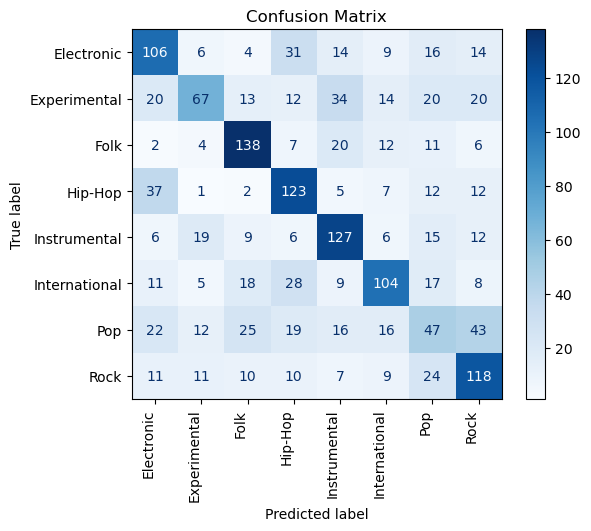

In [146]:
clf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, bootstrap=True)
clf.fit(X_train, y_train)
y_pred  = predict(model=clf, X_test=X_test,y_test=y_test)
confusion_matrix_plot(y_test=y_test,y_pred=y_pred)

Accuracy: 55.97%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.49      0.56      0.53       200
 Experimental       0.52      0.47      0.49       200
         Folk       0.67      0.70      0.69       200
      Hip-Hop       0.60      0.62      0.61       199
 Instrumental       0.61      0.64      0.63       200
International       0.66      0.57      0.61       200
          Pop       0.32      0.27      0.29       200
         Rock       0.58      0.64      0.61       200

     accuracy                           0.56      1599
    macro avg       0.56      0.56      0.56      1599
 weighted avg       0.56      0.56      0.56      1599



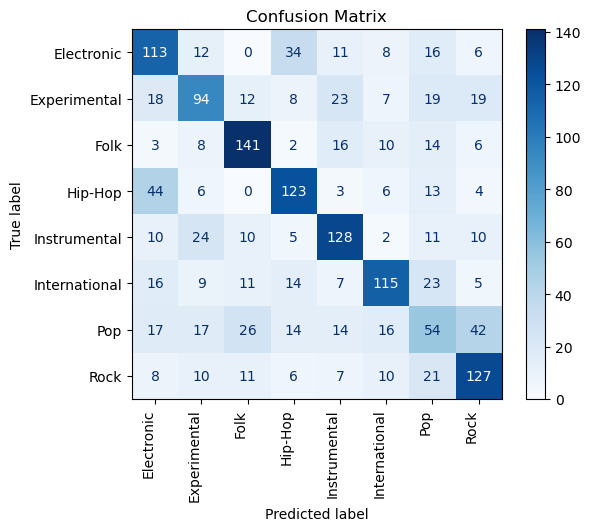

In [147]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred  = predict(model=clf, X_test=X_test,y_test=y_test)
confusion_matrix_plot(y_test=y_test,y_pred=y_pred)

Accuracy: 48.34%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.47      0.36      0.41       200
 Experimental       0.44      0.23      0.31       200
         Folk       0.52      0.73      0.60       200
      Hip-Hop       0.44      0.67      0.53       199
 Instrumental       0.61      0.41      0.49       200
International       0.50      0.65      0.56       200
          Pop       0.32      0.21      0.25       200
         Rock       0.54      0.59      0.56       200

     accuracy                           0.48      1599
    macro avg       0.48      0.48      0.47      1599
 weighted avg       0.48      0.48      0.47      1599



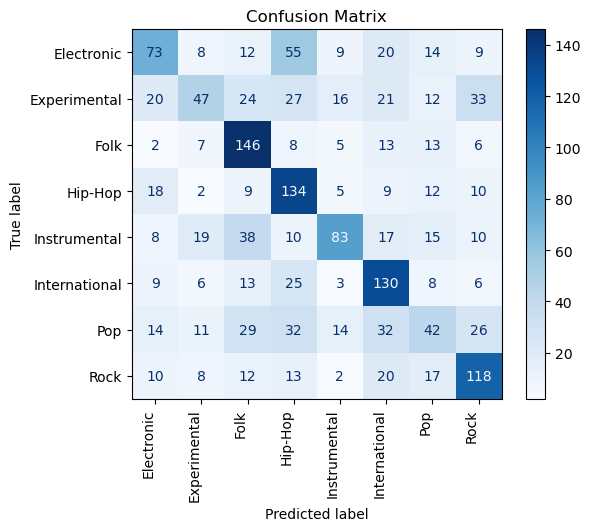

In [148]:
clf  = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred  = predict(model=clf, X_test=X_test,y_test=y_test)
confusion_matrix_plot(y_test=y_test,y_pred=y_pred)

In [149]:
#The final model => 3 algortims 
KNN= KNeighborsClassifier(n_neighbors=5)
RF = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, bootstrap=True)
SVC_RBF = SVC(kernel='rbf')
model = VotingClassifier(estimators=[
        ('kNN', KNN),('RandomForest', RF),('SVC', SVC_RBF)], voting='hard' , weights=[0.3, 0.35,0.45 ])
model.fit(X_train, y_train)


VotingClassifier(estimators=[('kNN', KNeighborsClassifier()),
                             ('RandomForest',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=500)),
                             ('SVC', SVC())],
                 weights=[0.3, 0.35, 0.45])

Accuracy: 56.29%
Classification Report:
               precision    recall  f1-score   support

   Electronic       0.50      0.54      0.52       200
 Experimental       0.55      0.41      0.47       200
         Folk       0.65      0.73      0.69       200
      Hip-Hop       0.55      0.65      0.60       199
 Instrumental       0.63      0.66      0.65       200
International       0.65      0.61      0.63       200
          Pop       0.34      0.26      0.30       200
         Rock       0.57      0.64      0.60       200

     accuracy                           0.56      1599
    macro avg       0.56      0.56      0.56      1599
 weighted avg       0.56      0.56      0.56      1599



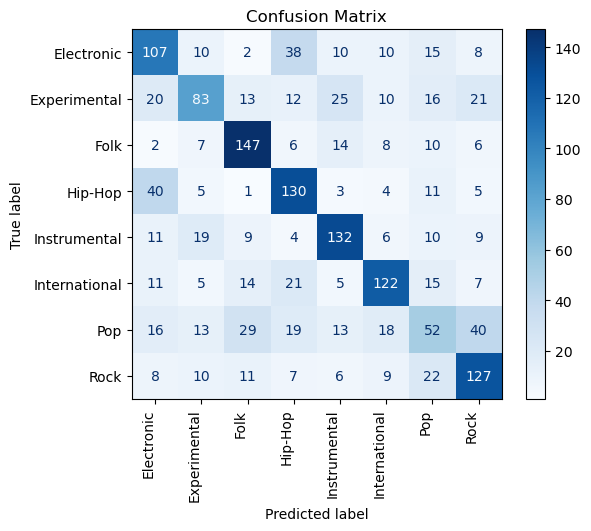

In [150]:
y_pred = predict(model=model, X_test=X_test,y_test=y_test)
confusion_matrix_plot(y_test, y_pred)